#  Data Visualization: 
# 1) Read dataset
# 2) Filling null values checking by Box pots
# 2) Calculate sum of power consumed per month using Bar and Line graphs 
# 3) Calculate sum of power consumed by each sub=meter per month using Bar and Line graphs
# 4) Calculate mean of power consumed per month using Bar and Line graphs 
# 5) Calculate mean of power consumed by each sub=meter per month using Bar and Line graphs


In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/electric-power-consumption-data-set/household_power_consumption.txt


In [2]:
# text file(.txt) converts into excel(CSV) file(.csv) and create csv file with rows and columns wise data
"""import csv
with open('C:/Users/Admin/Desktop/household_power_consumption.txt', 'r') as in_file:
    stripped = (line.strip() for line in in_file)
    lines = (line.split(";") for line in stripped if line)
    with open('household_power_consumption.csv', 'w') as out_file:
        writer = csv.writer(out_file)
        writer.writerows(lines)
"""

'import csv\nwith open(\'C:/Users/Admin/Desktop/household_power_consumption.txt\', \'r\') as in_file:\n    stripped = (line.strip() for line in in_file)\n    lines = (line.split(";") for line in stripped if line)\n    with open(\'household_power_consumption.csv\', \'w\') as out_file:\n        writer = csv.writer(out_file)\n        writer.writerows(lines)\n'

In [3]:
"""# read dataset
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
data1=pd.read_csv('household_power_consumption.csv')
data1.head()"""

"# read dataset\nimport pandas as pd \nimport matplotlib.pyplot as plt\nimport seaborn as sns\ndata1=pd.read_csv('household_power_consumption.csv')\ndata1.head()"

In [4]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
data=pd.read_csv('/kaggle/input/electric-power-consumption-data-set/household_power_consumption.txt', sep=';', 
                 parse_dates={'date_time' : ['Date', 'Time']}, infer_datetime_format=True, 
                 low_memory=False, na_values=['nan','?'], index_col='date_time')
data.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
date_time,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


* mergeing date and time column and make date_time index: 
* parse_dates : bool or list of int or names or list of lists or dict, default False: 
If a column or index cannot be represented as an array of datetimes, say because of an unparseable value or a mixture of timezones, the column or index will be returned unaltered as an object data type. For non-standard datetime parsing, use pd.to_datetime after pd.read_csv. To parse an index or column with a mixture of timezones, specify date_parser to be a partially-applied pandas.to_datetime() with utc=True. See Parsing a CSV with mixed timezones for more.
Note: A fast-path exists for iso8601-formatted dates.
* infer_datetime_format : bool, default False
    If True and `parse_dates` is enabled, pandas will attempt to infer the
    format of the datetime strings in the columns, and if it can be inferred,
    switch to a faster method of parsing them. In some cases this can increase
    the parsing speed by 5-10x.
* Nan values as consider  string convert in to numpy array ('nan' and '?' replace into Nan):
* na_values : scalar, str, list-like, or dict, optional Additional strings to recognize as NA/NaN. If dict passed, specific per-column NA values. By default the following values are interpreted as NaN: ‘’, ‘#N/A’, ‘#N/A N/A’, ‘#NA’, ‘-1.#IND’, ‘-1.#QNAN’, ‘-NaN’, ‘-nan’, ‘1.#IND’, ‘1.#QNAN’, ‘N/A’, ‘NA’, ‘NULL’, ‘NaN’, ‘n/a’, ‘nan’, ‘null’.
* low_memory : bool, default True Internally process the file in chunks, resulting in lower memory use
    while parsing, but possibly mixed type inference.  To ensure no mixed
    types either set False, or specify the type with the `dtype` parameter.
    Note that the entire file is read into a single DataFrame regardless,
    use the `chunksize` or `iterator` parameter to return the data in chunks.
    (Only valid with C parser).


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2075259 entries, 2006-12-16 17:24:00 to 2010-11-26 21:02:00
Data columns (total 7 columns):
Global_active_power      float64
Global_reactive_power    float64
Voltage                  float64
Global_intensity         float64
Sub_metering_1           float64
Sub_metering_2           float64
Sub_metering_3           float64
dtypes: float64(7)
memory usage: 126.7 MB


In [6]:
data.shape # checking how much raws and columns in dataset 

(2075259, 7)

In [7]:
#Counting the missing values
count=0
for i in data.isnull().sum(axis=1):
    if i>0:
        count=count+1
print('Total number of rows with missing values is ', count)
print('since it is only',round((count/len(data.index))*100), 'percent of the entire dataset the rows with missing values are excluded.')
data.describe()

Total number of rows with missing values is  25979
since it is only 1 percent of the entire dataset the rows with missing values are excluded.


,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
count,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06
mean,1.091615e+00,1.237145e-01,2.408399e+02,4.627759e+00,1.121923e+00,1.298520e+00,6.458447e+00
std,1.057294e+00,1.127220e-01,3.239987e+00,4.444396e+00,6.153031e+00,5.822026e+00,8.437154e+00
min,7.600000e-02,0.000000e+00,2.232000e+02,2.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.080000e-01,4.800000e-02,2.389900e+02,1.400000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,6.020000e-01,1.000000e-01,2.410100e+02,2.600000e+00,0.000000e+00,0.000000e+00,1.000000e+00
75%,1.528000e+00,1.940000e-01,2.428900e+02,6.400000e+00,0.000000e+00,1.000000e+00,1.700000e+01
max,1.112200e+01,1.390000e+00,2.541500e+02,4.840000e+01,8.800000e+01,8.000000e+01,3.100000e+01


In [8]:
data.isnull().sum()

Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
dtype: int64

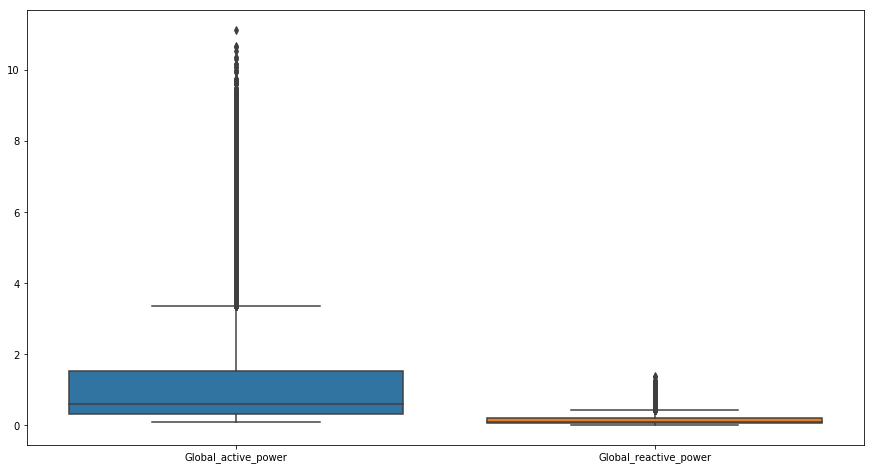

In [9]:
# plot boxplot for checking mean and median values for filling null values.
# we know which are better for filling null values mean or median.
plt.figure(figsize=(15,8))
sns.boxplot(data=data.iloc[:,:2])

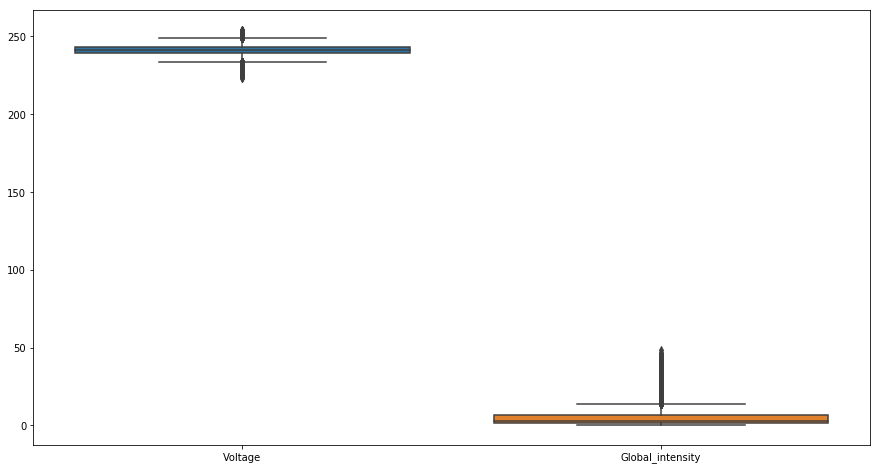

In [10]:
# plot boxplot for checking mean and median values for filling null values.
# we know which are better for filling null values mean or median.
plt.figure(figsize=(15,8))
sns.boxplot(data=data.iloc[:,2:4])

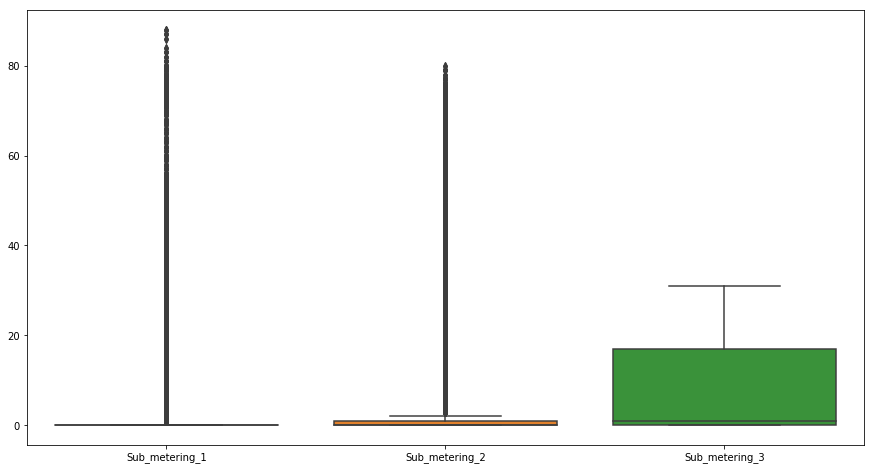

In [11]:
# plot boxplot for checking mean and median values for filling null values.
# we know which are better for filling null values mean or median.
plt.figure(figsize=(15,8))
sns.boxplot(data=data.iloc[:,4:])

* Note : median line bottom side of Q1 level that means above Q3 area is mean values thats why we should fill mean values in null.  

In [12]:
# filling nan with mean in any columns
for i in range(0,7):        
        data.iloc[:,i]=data.iloc[:,i].fillna(data.iloc[:,i].mean())

In [13]:
# another sanity check to make sure that there are not more any nan
data.isnull().sum()

Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

# Resample :
# resample() is a time-based groupby, followed by a reduction method on each of its groups.

* The resample function is very flexible and allows us to specify many different parameters to control the frequency conversion and resampling operation. sum, mean, std, sem,max, min, median, first, last, ohlc
are available as a method of the returned object by resample()

# Calculate power consumed per month 
1) Global_active_power
        
2) Global_reactive_power
       

# Global_active_power

In [14]:
# Sum of 'Global_active_power' resampled over month
data['Global_active_power'].resample('M').sum().head()

date_time
2006-12-31    41817.648460
2007-01-31    69014.045230
2007-02-28    56491.069230
2007-03-31    58863.283615
2007-04-30    39245.548781
Freq: M, Name: Global_active_power, dtype: float64

In [15]:
# mean of 'Global_active_power' resampled over month
data['Global_active_power'].resample('M').mean().head()

date_time
2006-12-31    1.901148
2007-01-31    1.546014
2007-02-28    1.401068
2007-03-31    1.318622
2007-04-30    0.908462
Freq: M, Name: Global_active_power, dtype: float64

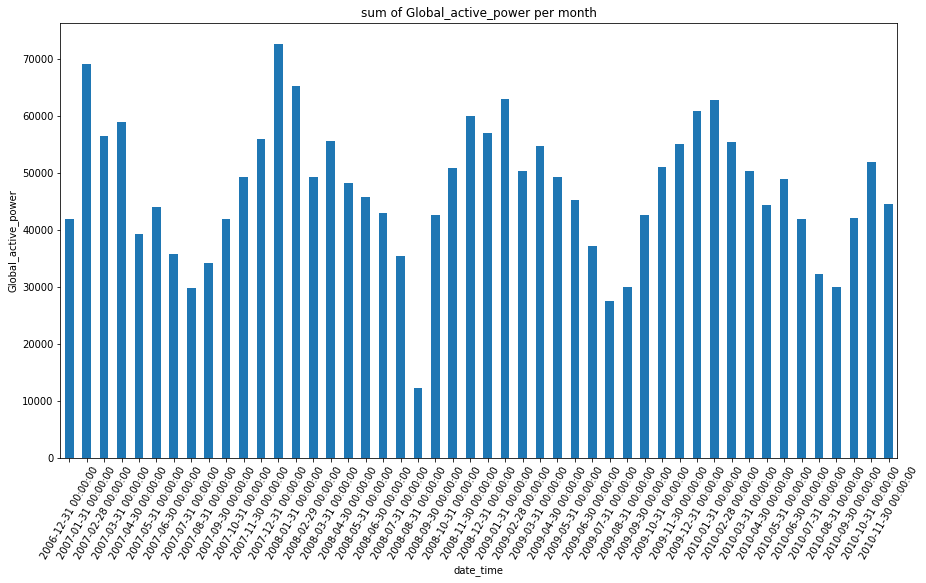

In [16]:
plt.figure(figsize=(15,8)) # size of plot
# Sum of 'Global_active_power' resampled over month
data['Global_active_power'].resample('M').sum().plot(kind='bar')
plt.xticks(rotation=60) #sequence Values to use for the xticks
plt.ylabel('Global_active_power')
plt.title('sum of Global_active_power per month')
plt.show()


* we can see months wise power consumption with time like 2006/13/31 -averange power consumed   1.901148 W and Sum of power=41817.648460 W

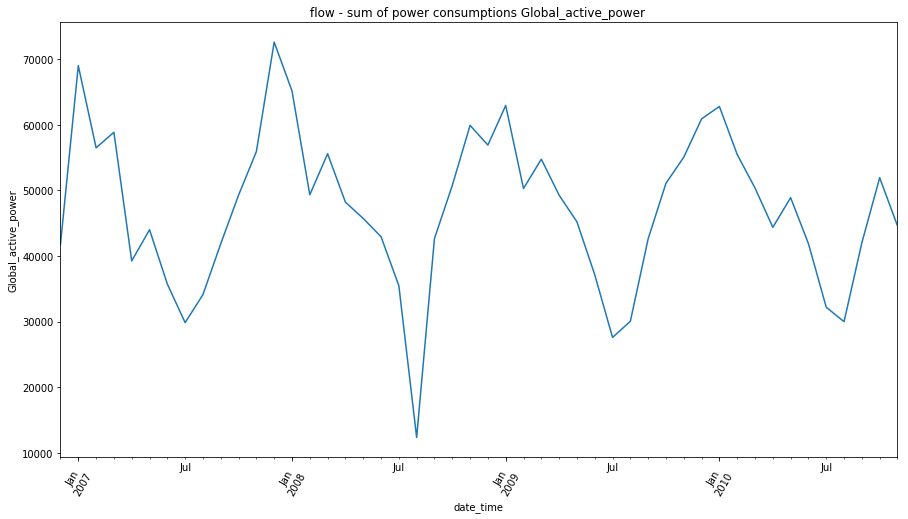

In [17]:
plt.figure(figsize=(15,8)) # size of plot
# Sum of 'Global_active_power' resampled over month
data['Global_active_power'].resample('M').sum().plot(kind='line')
plt.xticks(rotation=60)
plt.ylabel('Global_active_power')
plt.title('flow - sum of power consumptions Global_active_power ')
plt.show()

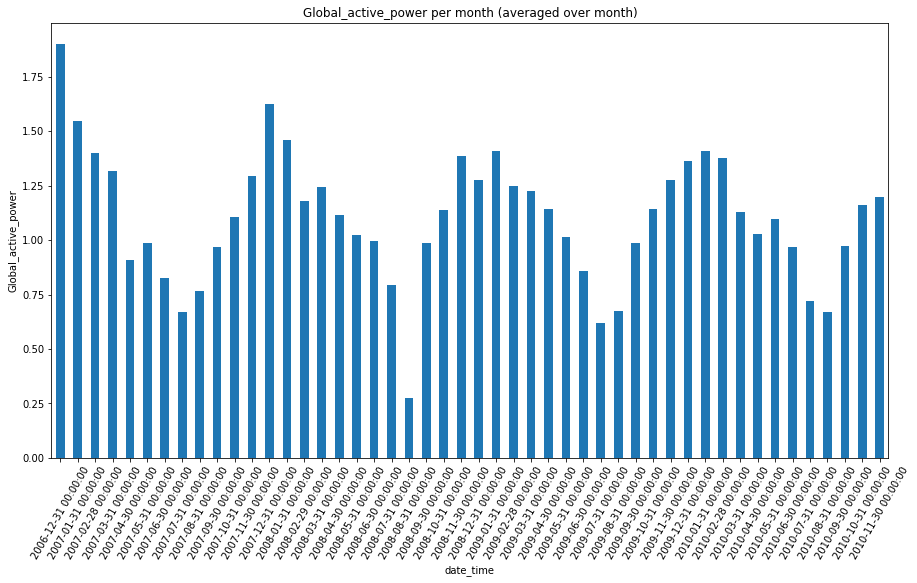

In [18]:
plt.figure(figsize=(15,8)) # size of plot
# Mean of 'Global_active_power' resampled over month
data['Global_active_power'].resample('M').mean().plot(kind='bar')
plt.xticks(rotation=60) #sequence Values to use for the xticks
plt.ylabel('Global_active_power')
plt.title('Global_active_power per month (averaged over month)')
plt.show()

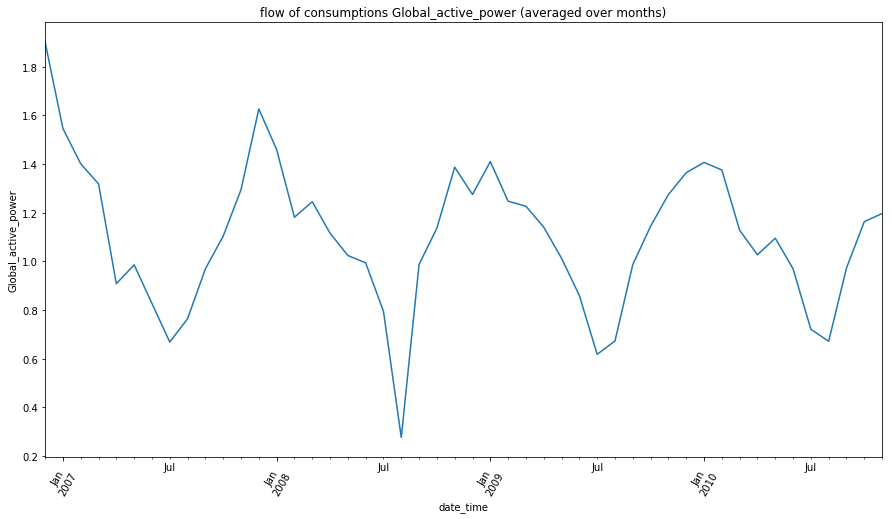

In [19]:
plt.figure(figsize=(15,8)) # size of plot
# mean of 'Global_active_power' resampled over month
data['Global_active_power'].resample('M').mean().plot(kind='line')
plt.xticks(rotation=60)
plt.ylabel('Global_active_power')
plt.title('flow of consumptions Global_active_power (averaged over months)')
plt.show()

# Global_reactive_power

In [20]:
# Sum of 'Global_reactive_power' resampled over month
data['Global_reactive_power'].resample('M').sum().head()

date_time
2006-12-31    2889.930858
2007-01-31    5922.643429
2007-02-28    4581.855429
2007-03-31    5122.307714
2007-04-30    5149.582995
Freq: M, Name: Global_reactive_power, dtype: float64

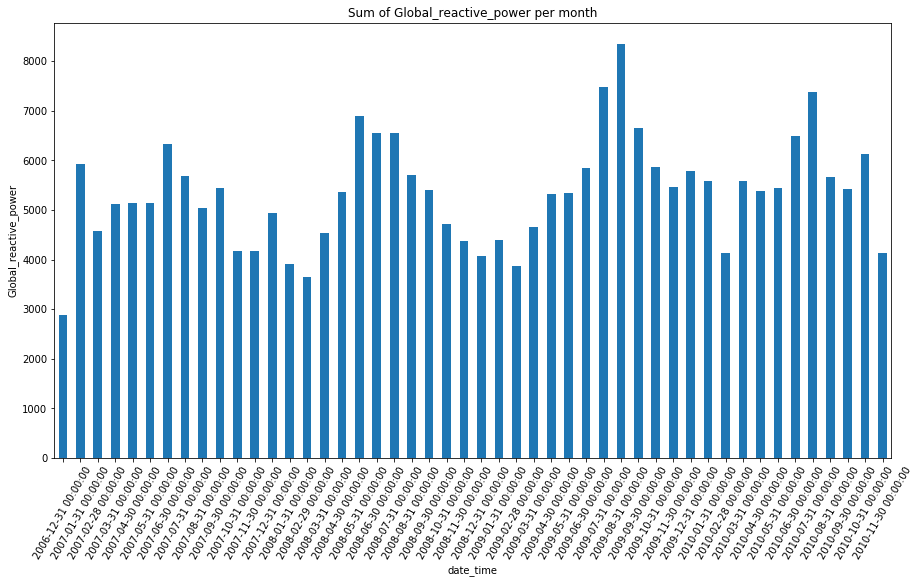

In [21]:
plt.figure(figsize=(15,8))
# Sum of 'Global_reactive_power' resampled over month
data['Global_reactive_power'].resample('M').sum().plot(kind='bar')
plt.xticks(rotation=60)
plt.ylabel('Global_reactive_power')
plt.title('Sum of Global_reactive_power per month')
plt.show()

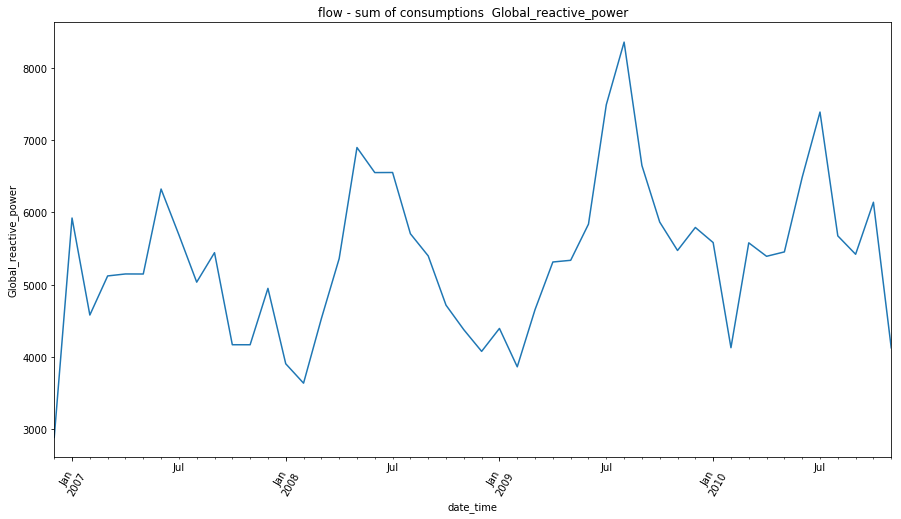

In [22]:
plt.figure(figsize=(15,8))
# Sum of 'Global_reactive_power' resampled over month
data['Global_reactive_power'].resample('M').sum().plot(kind='line')
plt.xticks(rotation=60)
plt.ylabel('Global_reactive_power')
plt.title('flow - sum of consumptions  Global_reactive_power')
plt.show()

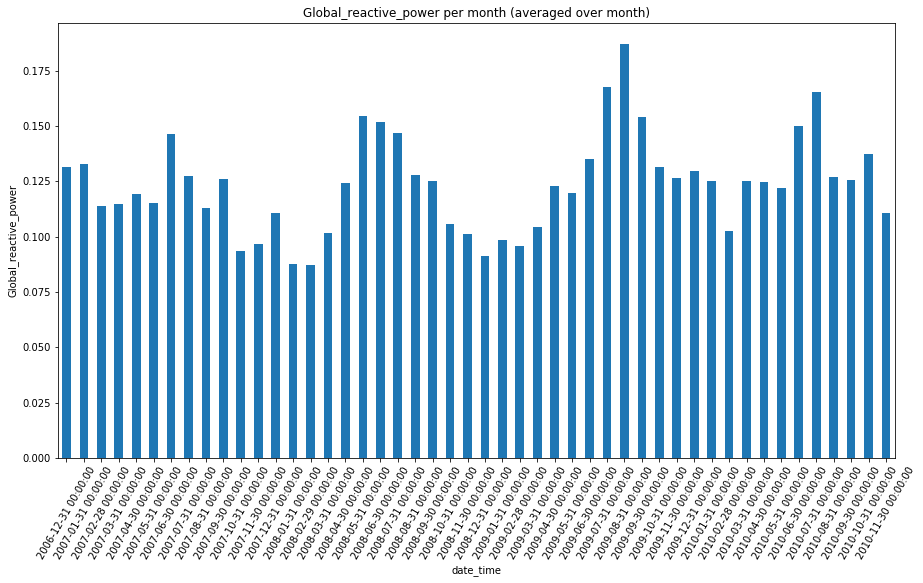

In [23]:
plt.figure(figsize=(15,8))
# mean of 'Global_reactive_power' resampled over month
data['Global_reactive_power'].resample('M').mean().plot(kind='bar')
plt.xticks(rotation=60)
plt.ylabel('Global_reactive_power')
plt.title('Global_reactive_power per month (averaged over month)')
plt.show()

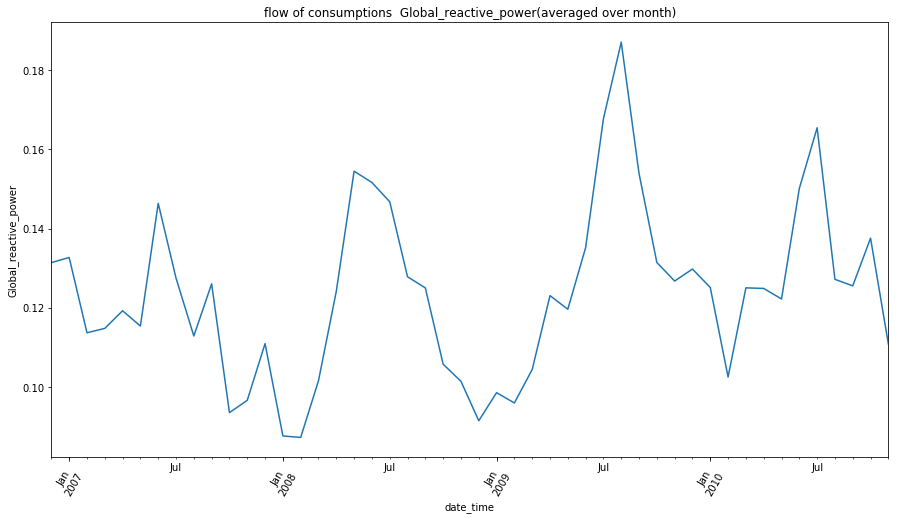

In [24]:
plt.figure(figsize=(15,8))
# mean of 'Global_reactive_power' resampled over month
data['Global_reactive_power'].resample('M').mean().plot(kind='line')
plt.xticks(rotation=60)
plt.ylabel('Global_reactive_power')
plt.title('flow of consumptions  Global_reactive_power(averaged over month)')
plt.show()

# Calculate power consumed by each sub=meter per month

1) Sub_metering_1

2) Sub_metering_2
 
3) Sub_metering_3

# Sub_metering_1

In [25]:
# Sum of 'Sub_metering_1' resampled over month
data['Sub_metering_1'].resample('M').sum().head()

date_time
2006-12-31    27464.487693
2007-01-31    56435.243847
2007-02-28    47586.243847
2007-03-31    60770.121923
2007-04-30    46254.920482
Freq: M, Name: Sub_metering_1, dtype: float64

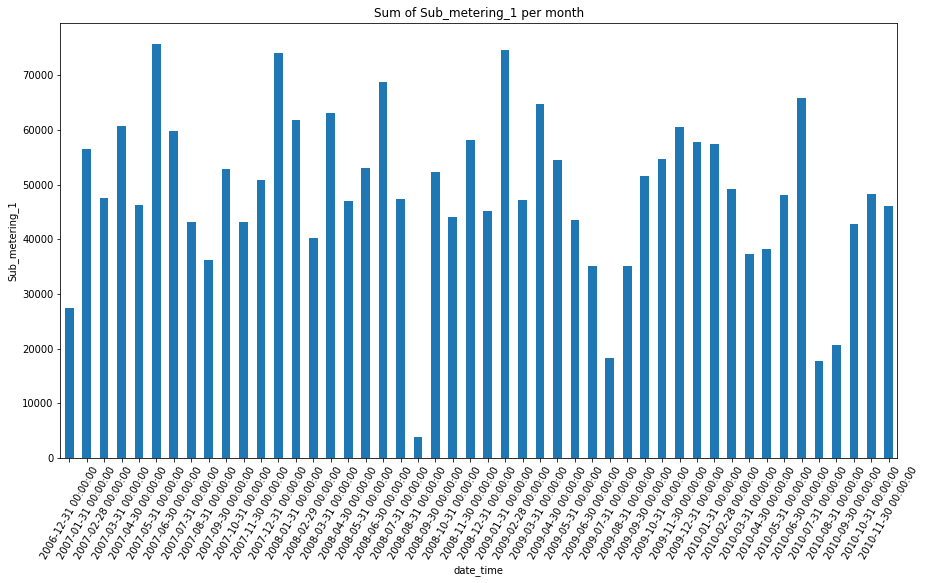

In [26]:
plt.figure(figsize=(15,8))
# Sum of 'Sub_metering_1' resampled over month
data['Sub_metering_1'].resample('M').sum().plot(kind='bar')
plt.xticks(rotation=60)
plt.ylabel('Sub_metering_1')
plt.title('Sum of Sub_metering_1 per month')
plt.show()

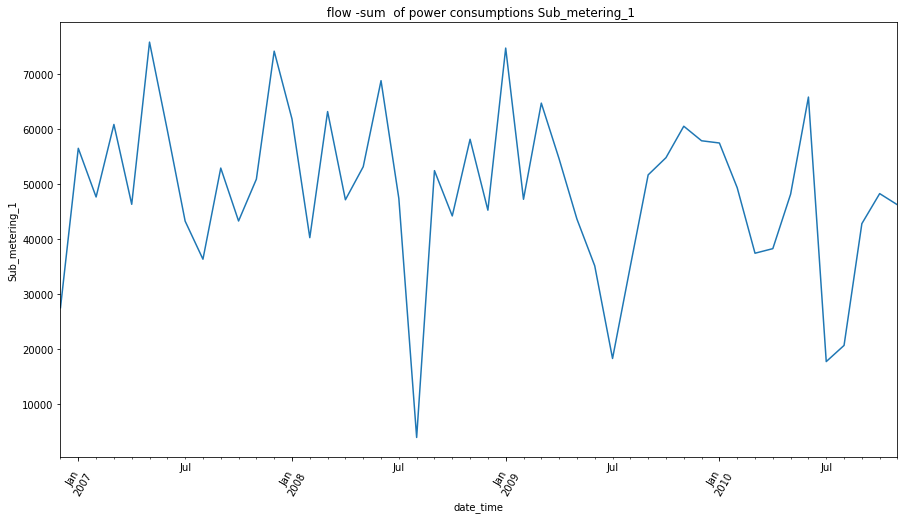

In [27]:
plt.figure(figsize=(15,8))
# Sum of 'Sub_metering_1' resampled over month
data['Sub_metering_1'].resample('M').sum().plot(kind='line')
plt.xticks(rotation=60)
plt.ylabel('Sub_metering_1')
plt.title(' flow -sum  of power consumptions Sub_metering_1')
plt.show()

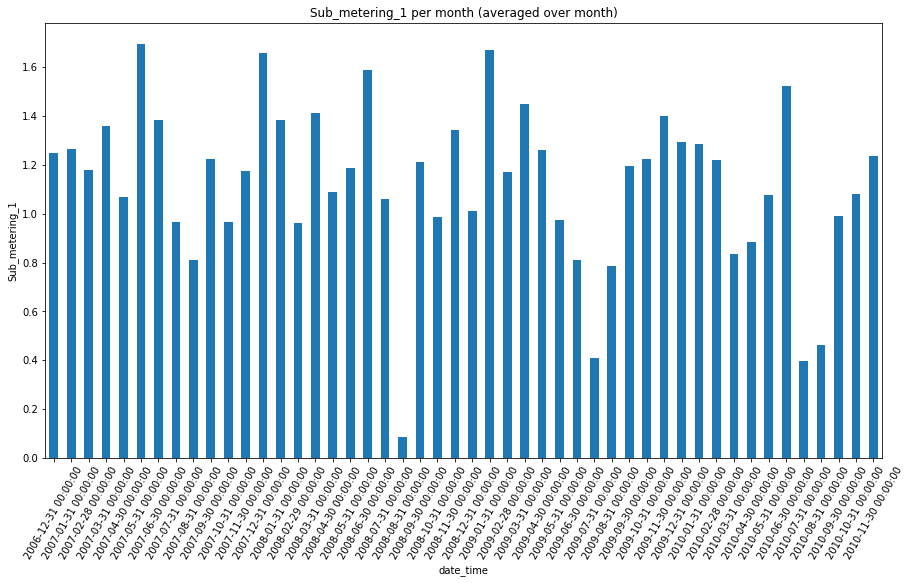

In [28]:
plt.figure(figsize=(15,8))
# mean of 'Sub_metering_1' resampled over month
data['Sub_metering_1'].resample('M').mean().plot(kind='bar')
plt.xticks(rotation=60)
plt.ylabel('Sub_metering_1')
plt.title('Sub_metering_1 per month (averaged over month)')
plt.show()

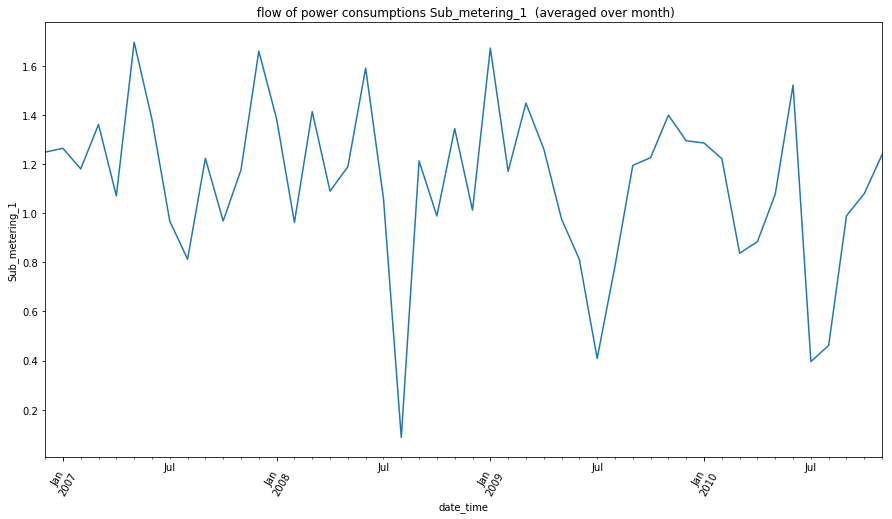

In [29]:
plt.figure(figsize=(15,8))
# mean of 'Sub_metering_1' resampled over month
data['Sub_metering_1'].resample('M').mean().plot(kind='line')
plt.xticks(rotation=60)
plt.ylabel('Sub_metering_1')
plt.title(' flow of power consumptions Sub_metering_1  (averaged over month)')
plt.show()

# Sub_metering_2

In [30]:
# Sum of 'Sub_metering_2' resampled over month
data['Sub_metering_2'].resample('M').sum().head()

date_time
2006-12-31     48717.194080
2007-01-31     79276.597040
2007-02-28     64606.597040
2007-03-31    104763.298520
2007-04-30     43251.389841
Freq: M, Name: Sub_metering_2, dtype: float64

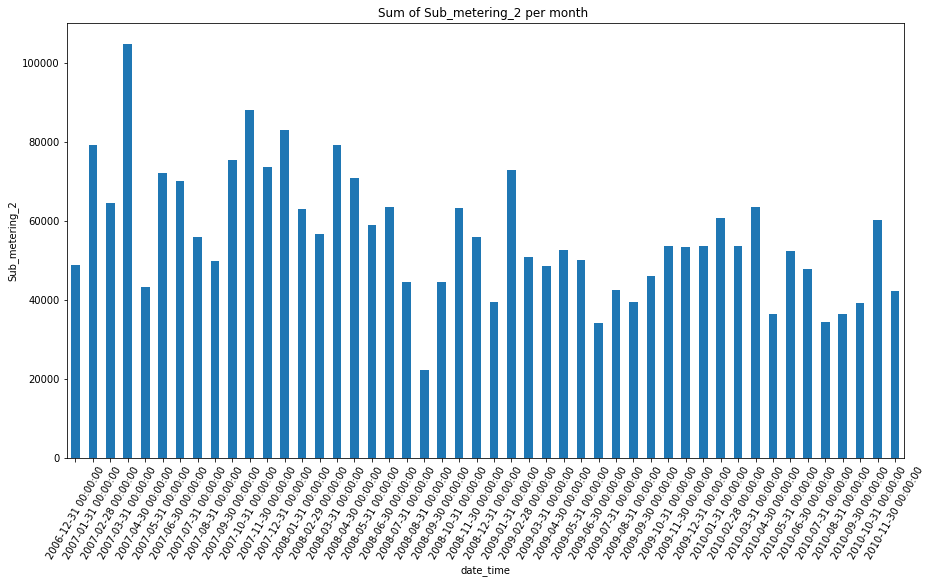

In [31]:
plt.figure(figsize=(15,8))
# Sum of 'Sub_metering_2' resampled over month
data['Sub_metering_2'].resample('M').sum().plot(kind='bar')
plt.xticks(rotation=60)
plt.ylabel('Sub_metering_2')
plt.title('Sum of Sub_metering_2 per month ')
plt.show()


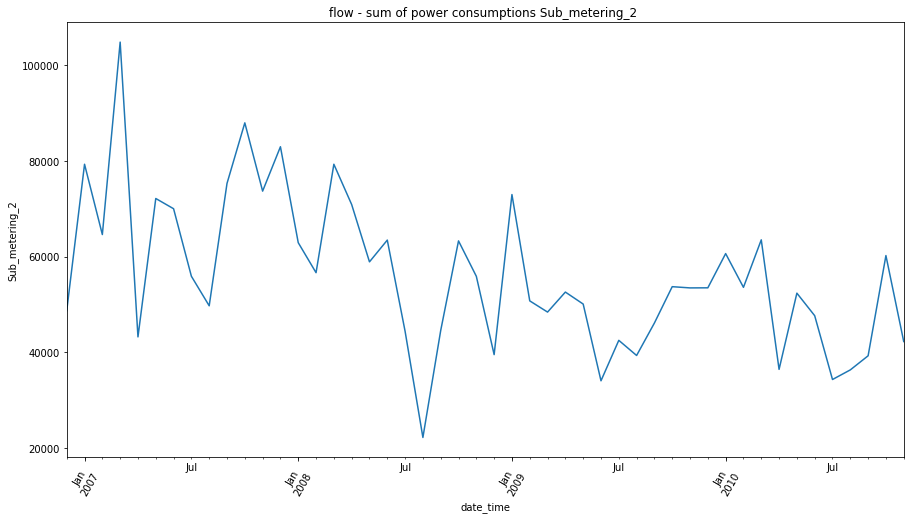

In [32]:
plt.figure(figsize=(15,8))
# Sum of 'Sub_metering_2' resampled over month
data['Sub_metering_2'].resample('M').sum().plot(kind='line')
plt.xticks(rotation=60)
plt.ylabel('Sub_metering_2')
plt.title('flow - sum of power consumptions Sub_metering_2 ')
plt.show()

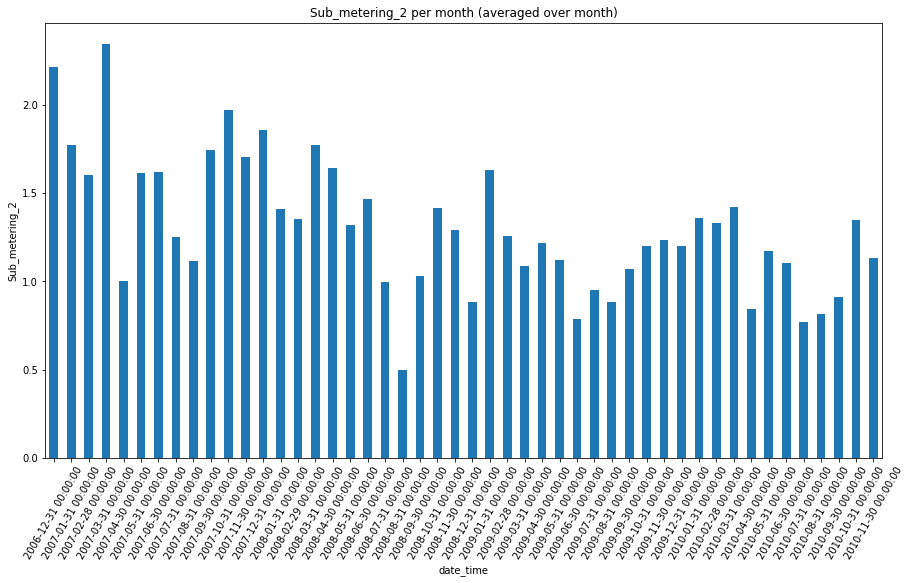

In [33]:
plt.figure(figsize=(15,8))
# mean of 'Sub_metering_2' resampled over month
data['Sub_metering_2'].resample('M').mean().plot(kind='bar')
plt.xticks(rotation=60)
plt.ylabel('Sub_metering_2')
plt.title('Sub_metering_2 per month (averaged over month)')
plt.show()

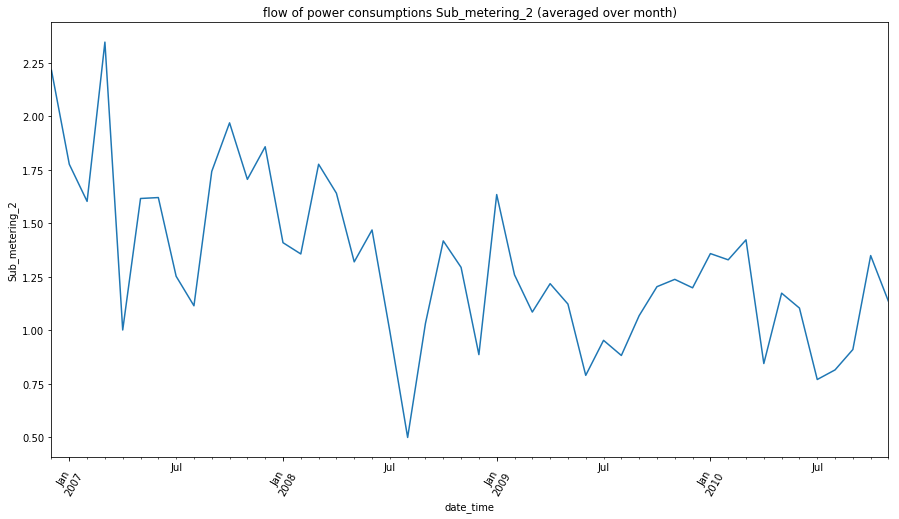

In [34]:
plt.figure(figsize=(15,8))
# mean of 'Sub_metering_2' resampled over month
data['Sub_metering_2'].resample('M').mean().plot(kind='line')
plt.xticks(rotation=60)
plt.ylabel('Sub_metering_2')
plt.title('flow of power consumptions Sub_metering_2 (averaged over month)')
plt.show()

 # Sub_metering_3

In [35]:
# Sum of 'Sub_metering_3' resampled over month
data['Sub_metering_3'].resample('M').sum().head()

date_time
2006-12-31    162976.833789
2007-01-31    329590.916895
2007-02-28    270286.916895
2007-03-31    290367.458447
2007-04-30    213547.799511
Freq: M, Name: Sub_metering_3, dtype: float64

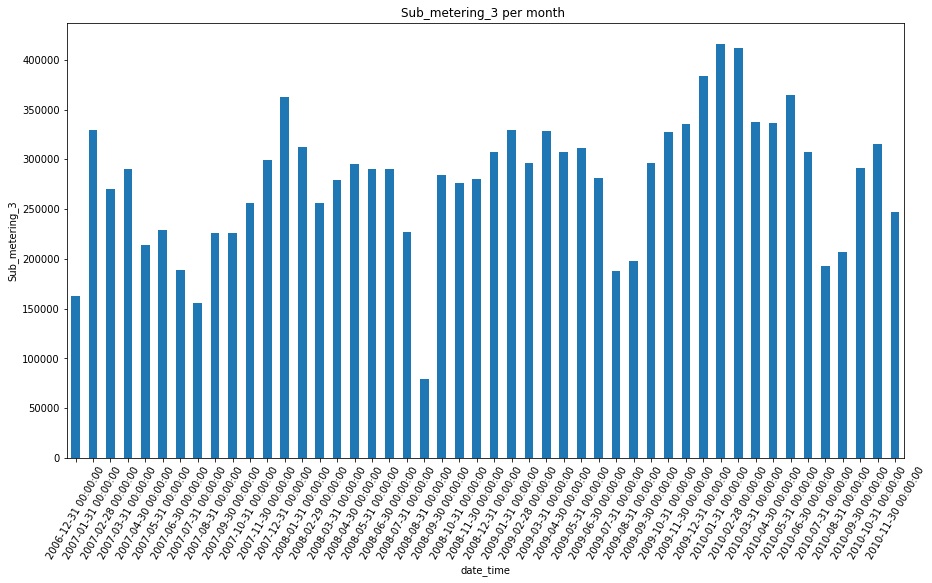

In [36]:
plt.figure(figsize=(15,8))
# Sum of 'Sub_metering_3' resampled over month
data['Sub_metering_3'].resample('M').sum().plot(kind='bar')
plt.xticks(rotation=60)
plt.ylabel('Sub_metering_3')
plt.title('Sub_metering_3 per month ')
plt.show()

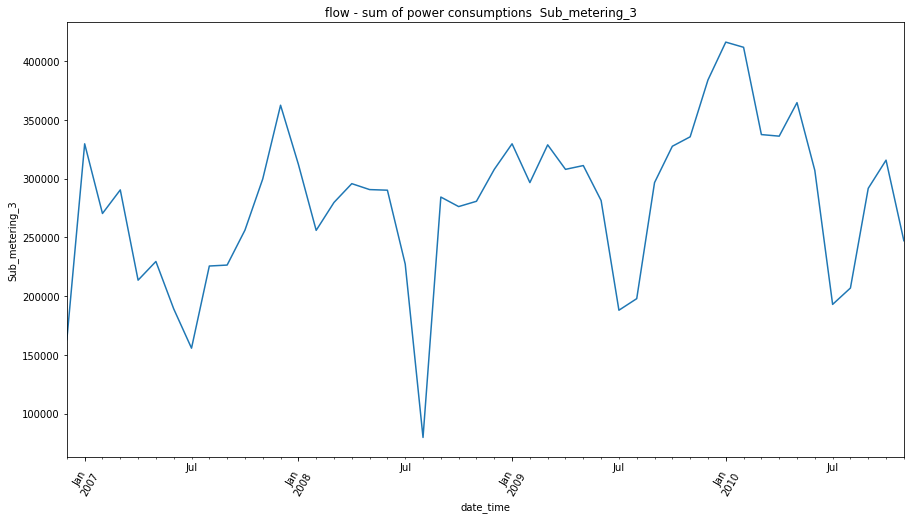

In [37]:
plt.figure(figsize=(15,8))
# Sum of 'Sub_metering_3' resampled over month
data['Sub_metering_3'].resample('M').sum().plot(kind='line')
plt.xticks(rotation=60)
plt.ylabel('Sub_metering_3')
plt.title('flow - sum of power consumptions  Sub_metering_3  ')
plt.show()

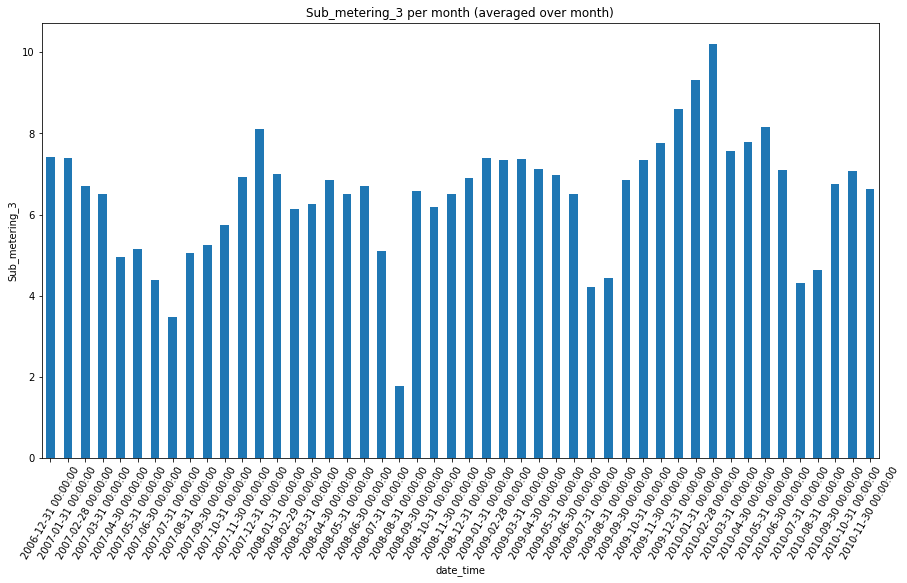

In [38]:
plt.figure(figsize=(15,8))
# mean of 'Sub_metering_3' resampled over month
data['Sub_metering_3'].resample('M').mean().plot(kind='bar')
plt.xticks(rotation=60)
plt.ylabel('Sub_metering_3')
plt.title('Sub_metering_3 per month (averaged over month)')
plt.show()

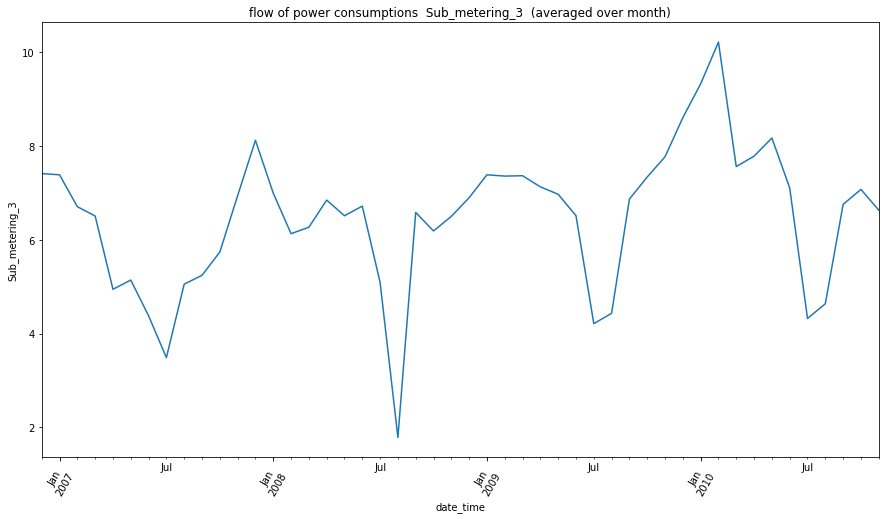

In [39]:
plt.figure(figsize=(15,8))
# Sum of 'Sub_metering_3' resampled over month
data['Sub_metering_3'].resample('M').mean().plot(kind='line')
plt.xticks(rotation=60)
plt.ylabel('Sub_metering_3')
plt.title('flow of power consumptions  Sub_metering_3  (averaged over month)')
plt.show()